# Classification using Tensorflow.

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k).

Here is some information about the data:

Column Name	Type	Description
age	Continuous	The age of the individual
workclass	Categorical	The type of employer the individual has (government, military, private, etc.).
fnlwgt	Continuous	The number of people the census takers believe that observation represents (sample weight). This variable will not be used.
education	Categorical	The highest level of education achieved for that individual.
education_num	Continuous	The highest level of education in numerical form.
marital_status	Categorical	Marital status of the individual.
occupation	Categorical	The occupation of the individual.
relationship	Categorical	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race	Categorical	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
gender	Categorical	Female, Male.
capital_gain	Continuous	Capital gains recorded.
capital_loss	Continuous	Capital Losses recorded.
hours_per_week	Continuous	Hours worked per week.
native_country	Categorical	Country of origin of the individual.
income	Categorical	">50K" or "<=50K", meaning whether the person makes more than $50,000 annually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler  # (used to standarize out data)
from sklearn.model_selection import train_test_split # ( used to seperate our data set to train and test set)

In [2]:
df=pd.read_csv("census_data.csv")

In [3]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [5]:
df.income_bracket.nunique()

2

First lets comvert out target column to numeric: Luck we dont have any missing value here

In [10]:
def income(x):
    if x ==" <=50K":
        return 0
    else:
        return 1

In [13]:
df["income_bracket"]=df["income_bracket"].apply(income)

In [14]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


So now where there income_braket is 0 they will make less than 50k if 1 they will make more than 50k

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X= df.drop("income_bracket",axis=1)
y=df.income_bracket

Now lets split out data set into train and test sets:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=29)

In [20]:
import tensorflow as tf

In [40]:
X.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [23]:
X.nunique()

age                73
workclass           9
education          16
education_num      16
marital_status      7
occupation         15
relationship        6
race                5
gender              2
capital_gain      119
capital_loss       92
hours_per_week     94
native_country     42
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27d47828>,
      dtype=object)

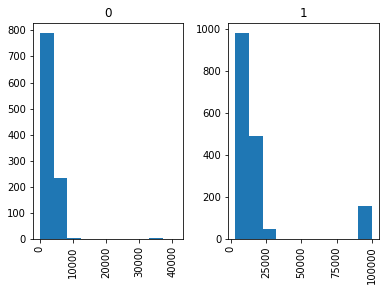

In [37]:
df[df["capital_gain"]!=0]["capital_gain"].hist(by=df.income_bracket)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a287c2ac8>,
      dtype=object)

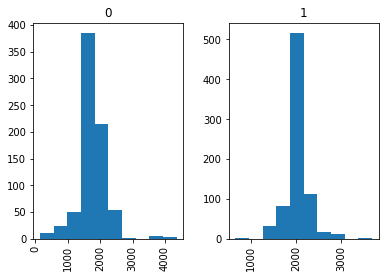

In [38]:
df[df["capital_loss"]!=0]["capital_loss"].hist(by=df.income_bracket)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a281029e8>,
      dtype=object)

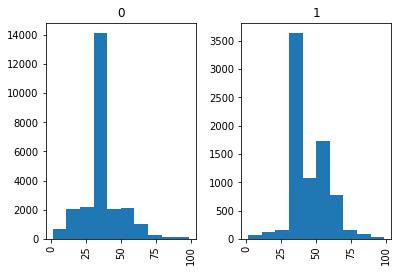

In [41]:
df[df["hours_per_week"]!=0]["hours_per_week"].hist(by=df.income_bracket)

Now let's sepetate out categorican and continous data from X dataframe. we can do this by using tensorflow categorical feature

In [138]:
age=tf.feature_column.numeric_column("age")
age=tf.feature_column.bucketized_column(age,boundaries=[31,46,60,75,90])

In [172]:
workclass=tf.feature_column.categorical_column_with_hash_bucket("workclass",hash_bucket_size=9)
workclass=tf.feature_column.embedding_column(workclass,9)

In [140]:
education=tf.feature_column.categorical_column_with_hash_bucket("education",hash_bucket_size=20)
education=tf.feature_column.embedding_column(education,dimension=16)

In [82]:
education_num=tf.feature_column.numeric_column("education_num")

In [144]:
marital_status=tf.feature_column.categorical_column_with_hash_bucket("marital_status",hash_bucket_size=10)
marital_status=tf.feature_column.embedding_column(marital_status,dimension=7)

In [156]:
occupation=tf.feature_column.categorical_column_with_hash_bucket("occupation",hash_bucket_size=10)
occupation=tf.feature_column.embedding_column(occupation,10)

In [155]:
relationship=tf.feature_column.categorical_column_with_hash_bucket("relationship",hash_bucket_size=10)
relationship=tf.feature_column.embedding_column(relationship,10)

In [161]:
race=tf.feature_column.categorical_column_with_vocabulary_list("race",[" White"," Black"," Asian-Pac-Islander",
                                                                       " Amer-Indian-Eskimo"," Other"])
race=tf.feature_column.embedding_column(race,5)

In [163]:
gender=tf.feature_column.categorical_column_with_vocabulary_list("gender",[" Male"," Female"])
gender=tf.feature_column.embedding_column(gender,2)

In [73]:
capital_gain=tf.feature_column.numeric_column("capital_gain")
capital_gain

In [74]:
capital_loss=tf.feature_column.numeric_column("capital_loss")

In [75]:
hours_per_week=tf.feature_column.numeric_column("hours_per_week")

In [149]:
native_country=tf.feature_column.categorical_column_with_hash_bucket("native_country",hash_bucket_size=50)
native_country=tf.feature_column.embedding_column(native_country,50)

In [139]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# Embeding Function need to use this for DNN clasifier 

In [130]:
gender=tf.feature_column.embedding_column(gender, dimension=2)

In [173]:

feat_col=[age,workclass,education,education_num,marital_status,
       occupation,relationship,race,gender,capital_gain,
       capital_loss,hours_per_week,native_country]

In [84]:
feat_col

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 HashedCategoricalColumn(key='workclass', hash_bucket_size=9, dtype=tf.string),
 HashedCategoricalColumn(key='education', hash_bucket_size=20, dtype=tf.string),
 NumericColumn(key='education_num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 HashedCategoricalColumn(key='marital_status', hash_bucket_size=10, dtype=tf.string),
 HashedCategoricalColumn(key='occupation', hash_bucket_size=10, dtype=tf.string),
 HashedCategoricalColumn(key='relationship', hash_bucket_size=10, dtype=tf.string),
 VocabularyListCategoricalColumn(key='race', vocabulary_list=(' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='gender', vocabulary_list=(' Male', ' Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='capital_gain', shape=(1,), de

In [127]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=100,num_epochs=1000,shuffle=True)

In [128]:
model=tf.estimator.LinearClassifier(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp_y6fblsg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2df969b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [129]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp_y6fblsg/model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 108.796
INFO:tensorflow:loss = 628.5217, step = 101 (0.924 sec)
INFO:tensorflow:global_step/sec: 227.754
INFO:tensorflow:loss = 530.58234, step = 201 (0.439 sec)
INFO:tensorflow:global_step/sec: 223.932
INFO:tensorflow:loss = 36.249405, step = 301 (0.445 sec)
INFO:tensorflow:global_step/sec: 185.682
INFO:tensorflow:loss = 65.14705, step = 401 (0.540 sec)
INFO:tensorflow:global_step/sec: 215.113
INFO:tensorflow:loss = 214.11734, step = 501 (0.461 sec)
INFO:tensorflow:global_step/sec: 218.928
INFO:tensorflow:loss = 86.83451, step = 601 (0.461 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 45.119534, step = 8001 (0.672 sec)
INFO:tensorflow:global_step/sec: 204.022
INFO:tensorflow:loss = 46.192196, step = 8101 (0.489 sec)
INFO:tensorflow:global_step/sec: 223.044
INFO:tensorflow:loss = 36.483337, step = 8201 (0.451 sec)
INFO:tensorflow:global_step/sec: 226.658
INFO:tensorflow:loss = 43.576965, step = 8301 (0.440 sec)
INFO:tensorflow:global_step/sec: 219.481
INFO:tensorflow:loss = 26.636354, step = 8401 (0.454 sec)
INFO:tensorflow:global_step/sec: 157.45
INFO:tensorflow:loss = 29.76714, step = 8501 (0.641 sec)
INFO:tensorflow:global_step/sec: 224.243
INFO:tensorflow:loss = 53.04419, step = 8601 (0.440 sec)
INFO:tensorflow:global_step/sec: 224.646
INFO:tensorflow:loss = 34.856026, step = 8701 (0.447 sec)
INFO:tensorflow:global_step/sec: 213.997
INFO:tensorflow:loss = 45.07127, step = 8801 (0.467 sec)
INFO:tensorflow:global_step/sec: 167.247
INFO:tensorflow:loss = 48.333916, step = 8901 (0.602 sec)
INFO:tensorflow:global_step/sec: 223.857
INFO:tensorflo

INFO:tensorflow:global_step/sec: 233.71
INFO:tensorflow:loss = 39.50627, step = 16301 (0.429 sec)
INFO:tensorflow:global_step/sec: 261.236
INFO:tensorflow:loss = 36.873707, step = 16401 (0.385 sec)
INFO:tensorflow:global_step/sec: 267.182
INFO:tensorflow:loss = 31.310926, step = 16501 (0.373 sec)
INFO:tensorflow:global_step/sec: 261.358
INFO:tensorflow:loss = 31.16113, step = 16601 (0.383 sec)
INFO:tensorflow:global_step/sec: 276.328
INFO:tensorflow:loss = 32.347603, step = 16701 (0.360 sec)
INFO:tensorflow:global_step/sec: 261.349
INFO:tensorflow:loss = 28.221678, step = 16801 (0.383 sec)
INFO:tensorflow:global_step/sec: 281.631
INFO:tensorflow:loss = 29.823353, step = 16901 (0.356 sec)
INFO:tensorflow:global_step/sec: 286.777
INFO:tensorflow:loss = 82.89658, step = 17001 (0.347 sec)
INFO:tensorflow:global_step/sec: 294.121
INFO:tensorflow:loss = 36.42082, step = 17101 (0.344 sec)
INFO:tensorflow:global_step/sec: 280.439
INFO:tensorflow:loss = 25.200294, step = 17201 (0.351 sec)
INFO:

In [185]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [186]:
prediction=model.predict(input_fn=eval_input_func)

my_pred=list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp_y6fblsg/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [187]:
pred_y=[]
for pred in my_pred:
    pred_y.append(pred["class_ids"][0])
    

In [188]:
len(pred_y)

9769

In [189]:
from sklearn.metrics import  classification_report

In [190]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7401
           1       0.68      0.51      0.58      2368

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.72      0.74      9769
weighted avg       0.81      0.82      0.81      9769



# DNN Estimator

In [174]:
input_function=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=100,num_epochs=1000,shuffle=True)

In [175]:
model_dnn= tf.estimator.DNNClassifier(hidden_units=[13,13,13],feature_columns=feat_col,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmpo23on2zk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2d7c3860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [177]:
model_dnn.train(input_fn=input_function,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmpo23on2zk/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 100 into /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmpo23on2zk/model.ckpt.
INFO:tensorflow:loss = 58.53389, step = 101
INFO:tensorflow:global_step/sec: 99.215
INFO:tensorflow:loss = 29.467724, step = 201 (1.010 sec)
INFO:tensorflow:global_step/sec: 220.344
INFO:tensorflow:loss = 37.98155, step = 301 (0.455 sec)
INFO:tensorflow:global_step/sec: 149.471
INFO:tensorflow:loss = 51.092964, step = 401 (0.667 sec)
INFO:tensorflow:global_step/sec: 232.149
INFO:tensorflow:loss = 30.449495, step = 501 (0.434 sec)
INFO:tensorflow:global_step/sec: 203.936
INFO:tensorflow:loss = 31.599936, step = 601 (0.4

INFO:tensorflow:global_step/sec: 207.679
INFO:tensorflow:loss = 27.333847, step = 8001 (0.483 sec)
INFO:tensorflow:global_step/sec: 241.906
INFO:tensorflow:loss = 28.260517, step = 8101 (0.412 sec)
INFO:tensorflow:global_step/sec: 226.483
INFO:tensorflow:loss = 32.502953, step = 8201 (0.442 sec)
INFO:tensorflow:global_step/sec: 235.21
INFO:tensorflow:loss = 32.106613, step = 8301 (0.424 sec)
INFO:tensorflow:global_step/sec: 235.758
INFO:tensorflow:loss = 29.695408, step = 8401 (0.426 sec)
INFO:tensorflow:global_step/sec: 240.639
INFO:tensorflow:loss = 35.809696, step = 8501 (0.414 sec)
INFO:tensorflow:global_step/sec: 210.446
INFO:tensorflow:loss = 42.779446, step = 8601 (0.477 sec)
INFO:tensorflow:global_step/sec: 221.173
INFO:tensorflow:loss = 36.306164, step = 8701 (0.450 sec)
INFO:tensorflow:global_step/sec: 200.714
INFO:tensorflow:loss = 30.229557, step = 8801 (0.498 sec)
INFO:tensorflow:global_step/sec: 227.608
INFO:tensorflow:loss = 36.225445, step = 8901 (0.439 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 236.213
INFO:tensorflow:loss = 34.14196, step = 16301 (0.425 sec)
INFO:tensorflow:global_step/sec: 189.995
INFO:tensorflow:loss = 27.343344, step = 16401 (0.528 sec)
INFO:tensorflow:global_step/sec: 197.815
INFO:tensorflow:loss = 33.65441, step = 16501 (0.502 sec)
INFO:tensorflow:global_step/sec: 245.178
INFO:tensorflow:loss = 29.714848, step = 16601 (0.411 sec)
INFO:tensorflow:global_step/sec: 217.192
INFO:tensorflow:loss = 31.045334, step = 16701 (0.458 sec)
INFO:tensorflow:global_step/sec: 202.037
INFO:tensorflow:loss = 39.52472, step = 16801 (0.495 sec)
INFO:tensorflow:global_step/sec: 235.278
INFO:tensorflow:loss = 29.892271, step = 16901 (0.425 sec)
INFO:tensorflow:global_step/sec: 242.406
INFO:tensorflow:loss = 48.52636, step = 17001 (0.412 sec)
INFO:tensorflow:global_step/sec: 246.163
INFO:tensorflow:loss = 32.52264, step = 17101 (0.409 sec)
INFO:tensorflow:global_step/sec: 233.371
INFO:tensorflow:loss = 28.663961, step = 17201 (0.426 sec)
INFO:

In [178]:
pred_func= tf.estimator.inputs.pandas_input_fn(X_test,batch_size=len(X_test),shuffle=False)

In [180]:
pred_gen=model_dnn.predict(pred_func)

In [181]:
predection=list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmpo23on2zk/model.ckpt-20100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [182]:
final_pred=[pred["class_ids"][0] for pred in predection]

In [184]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7401
           1       0.72      0.59      0.65      2368

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

